In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import warnings

warnings.filterwarnings('ignore')

In [2]:
movie = pd.read_csv('movies.csv')
credit = pd.read_csv('credits.csv')

In [3]:
movie_credit = pd.merge(movie , credit , left_on = 'id' , right_on = 'movie_id')
movie_credit

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]",...,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],...,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,72766,Newlyweds,"[

## Release Date Time Series

In [4]:
movie_credit['release_date']

0       2009-12-10
1       2007-05-19
2       2015-10-26
3       2012-07-16
4       2012-03-07
           ...    
4798    1992-09-04
4799    2011-12-26
4800    2013-10-13
4801    2012-05-03
4802    2005-08-05
Name: release_date, Length: 4803, dtype: object

In [5]:
movie_credit['release_date'].isnull().sum()

1

In [6]:
movie_credit['release_date'] = pd.to_datetime(movie_credit['release_date'])
movie_credit['release_date'] 

0      2009-12-10
1      2007-05-19
2      2015-10-26
3      2012-07-16
4      2012-03-07
          ...    
4798   1992-09-04
4799   2011-12-26
4800   2013-10-13
4801   2012-05-03
4802   2005-08-05
Name: release_date, Length: 4803, dtype: datetime64[ns]

In [7]:
release_date = movie_credit['release_date']

# Extract release years from Dates

release_month = release_date.dt.month

#Count no. of movies per

movie_count_in_month = release_month.value_counts().sort_index()

movie_count_in_month

1.0     382
2.0     326
3.0     372
4.0     350
5.0     363
6.0     389
7.0     363
8.0     413
9.0     588
10.0    474
11.0    326
12.0    456
Name: release_date, dtype: int64

In [8]:
release_date = movie_credit['release_date']

# Extract release years from Dates

release_years = release_date.dt.year

#Count no. of movies per

movie_count_per_year = release_years.value_counts().sort_index()

movie_count_per_year

1916.0      1
1925.0      1
1927.0      1
1929.0      2
1930.0      1
         ... 
2013.0    231
2014.0    238
2015.0    216
2016.0    104
2017.0      1
Name: release_date, Length: 90, dtype: int64

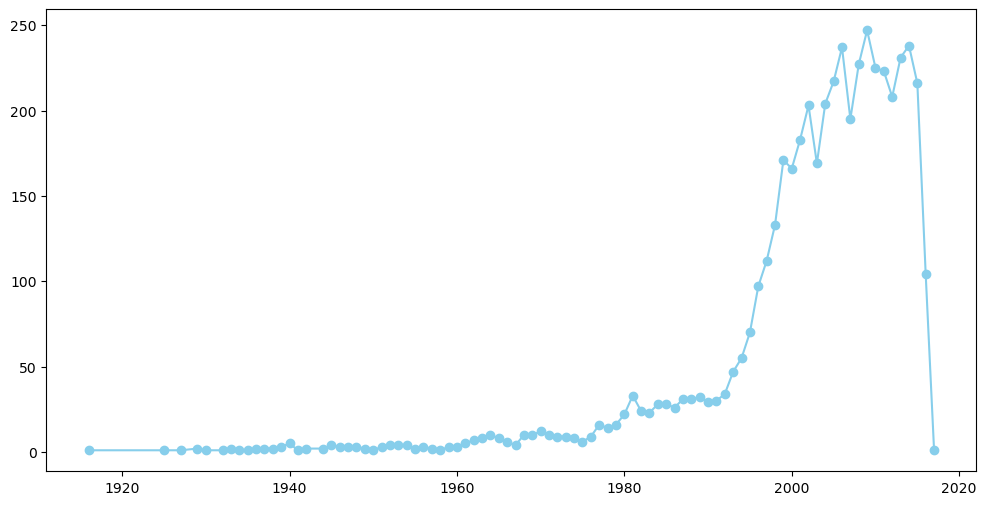

In [9]:
release_date = movie_credit['release_date']

# Extract release years from Dates

release_years = release_date.dt.year

#Count no. of movies per

movie_count_per_year = release_years.value_counts().sort_index()

#Create Time Series plot

plt.figure(figsize = (12,6))
plt.plot(movie_count_per_year.index, movie_count_per_year.values , marker = 'o', color = 'skyblue' , linestyle = '-' , markersize = 6 )


plt.show()

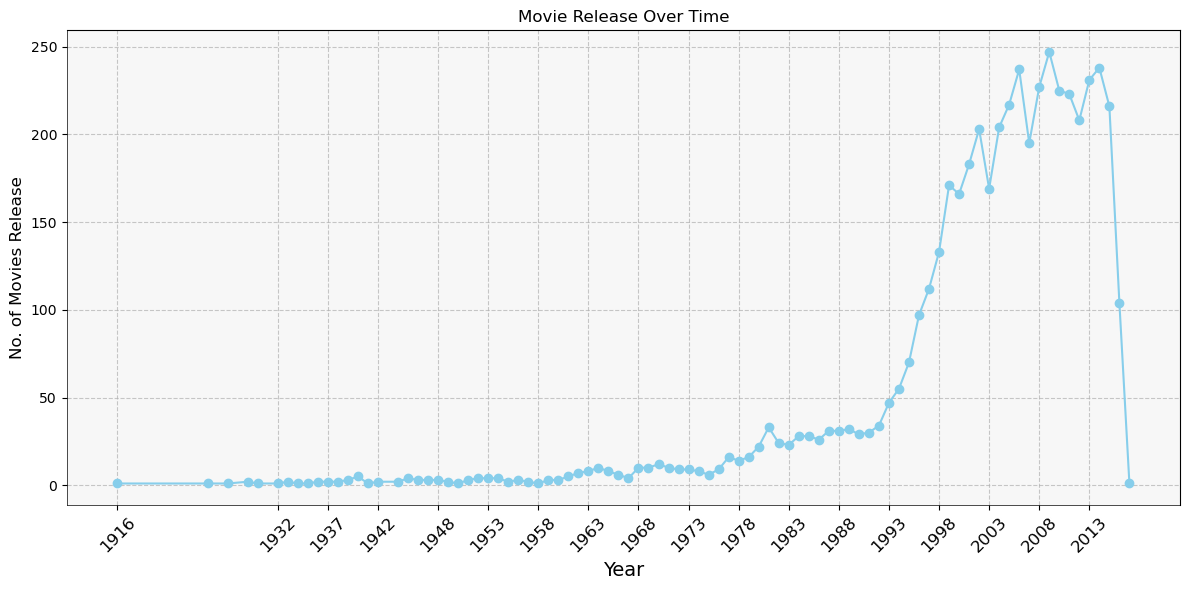

In [29]:
release_date = movie_credit['release_date']

# Extract release years from Dates

release_years = release_date.dt.year

#Count no. of movies per

movie_count_per_year = release_years.value_counts().sort_index()

#Create Time Series plot

plt.figure(figsize = (12,6))
plt.plot(movie_count_per_year.index, movie_count_per_year.values , marker = 'o', color = 'skyblue' , linestyle = '-' , markersize = 6 )
plt.xlabel('Year' , fontsize = 14)
plt.ylabel('No. of Movies Release' , fontsize =12)
plt.title('Movie Release Over Time' , fontsize = 12)

#Customize Appearance

plt.xticks(rotation = 45 , fontsize = 12)
plt.xticks(fontsize = 12)
plt.grid(True , linestyle = '--' , alpha = 0.7)
plt.gca().spines['top'].set_visible(0.5)
plt.gca().spines['right'].set_visible(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)

#add background color


plt.gca().set_facecolor("#f7f7f7")

# Limit no. of x axis & show every 5 years

plt.xticks(movie_count_per_year.index[::5])

plt.tight_layout()

plt.show()